In [179]:
import pandas as pd

In [180]:
# Load the Excel file
filename = "data/ICAtitanic.xlsx"
df = pd.read_excel(filename) # create a pandas object

In [181]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [182]:
print(df.head())
print(df.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

# Can you answer the following questions?

- How many people were on the Titanic?
- How many survived? How many died?
- How many people were in 1st, 2nd, and 3rd class?
- How many people died in each class?
- How many men (males 18 or older) died, women (female 18 or older) and children (age < 18) died?

Does the data tell a story about who lived and who died?

In [183]:
# to check how many people we can just check the rows of the data
print(df.shape[0])

891


In [184]:
# to check how many survived and how many died filter survived by 1 and 0
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [185]:
print(df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [186]:
# use crosstab to check how many people die/survive based on Pclass
print(pd.crosstab(df['Pclass'], df['Survived']))

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [187]:
# to do this filter out the DF for that specific values 

# Dead men 18 or older
dead_men = df[(df['Survived'] == 0) & (df['Sex'] == 'male') & (df['Age'] >= 18)].shape[0]

# Dead women 18 or older
dead_women = df[(df['Survived'] == 0) & (df['Sex'] == 'female') & (df['Age'] >= 18)].shape[0]

# Dead children (age < 18)
dead_children = df[(df['Survived'] == 0) & (df['Age'] < 18)].shape[0]

print("Dead men (18+):", dead_men)
print("Dead women (18+):" , dead_women)
print("Dead children (<18):", dead_children)

Dead men (18+): 325
Dead women (18+): 47
Dead children (<18): 52


# Graphing portion


In [188]:
import matplotlib.pyplot as plt

# 1. Did gender play a role in survival rates?

- **Graph Type:** Bar Plot or Grouped Bar Plot
- **Objective:** Examine survival rates for males and females.
- **Question Prompt:** Create a bar chart or grouped bar chart to compare the survival rates for men and women. What does this tell you about gender differences in survival?



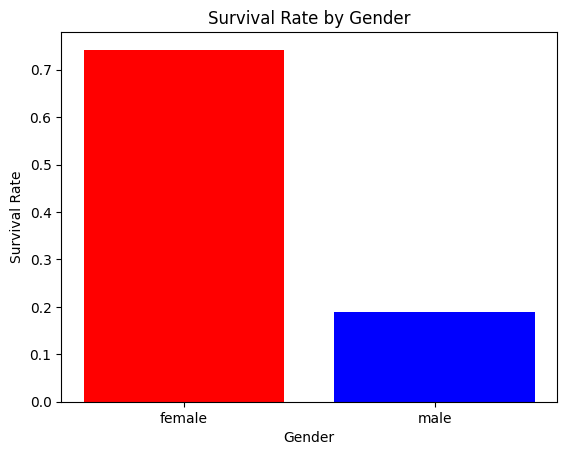

In [189]:

survival_by_gender = df.groupby("Sex")["Survived"].mean()

plt.bar(survival_by_gender.index,survival_by_gender.values, color=["red", "blue"])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

### female survive more than male

# 2. How does age relate to survival?  

- **Graph Type:** Line Plot or Histogram
- **Objective:** Analyze survival rates across different age groups.
- **Question Prompt:** Create a histogram or line plot to show the survival distribution across different age ranges. Does age impact the likelihood of survival?

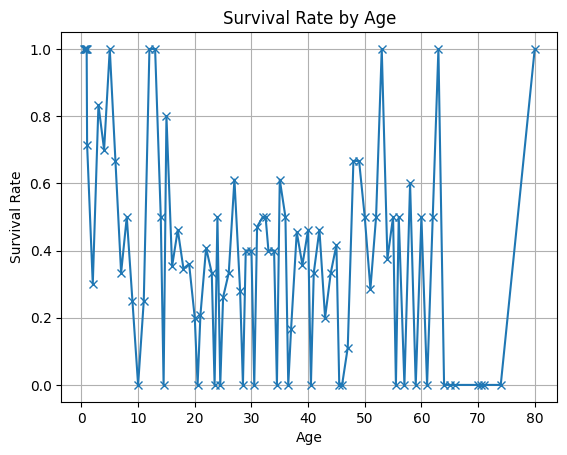

In [190]:
survival_by_age = df.groupby('Age')['Survived'].mean()

plt.plot(survival_by_age.index,survival_by_age.values, marker='x')
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.grid()
plt.show()

### seem like the younger age and older age have a high change of survival maybe bc they are more important ?

# 3. Were wealthier passengers more likely to survive?  

- **Graph Type:** Box Plot or Scatter Plot
- **Objective:** Investigate the relationship between survival rate and fare ticket
- **Question Prompt:** Create a box or scatter plot to explore how survival rates differ based on ticket fare. Does wealth correlate with higher survival rate?

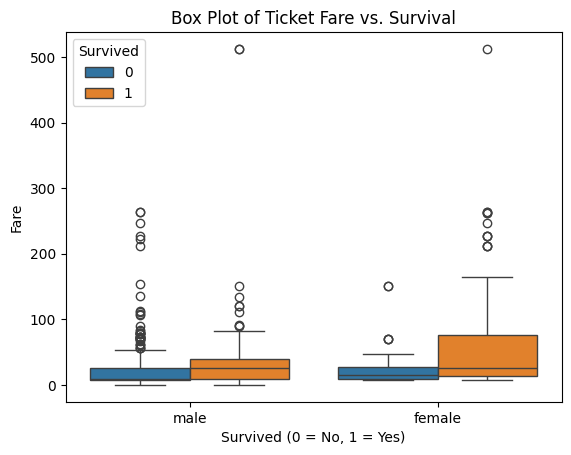

In [191]:
#box plot
import seaborn as sns
sns.boxplot(x="Sex", y="Fare",hue="Survived" ,data=df)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.title("Box Plot of Ticket Fare vs. Survival")
plt.show()

### seem like the is not much correclation that the more you pay you survived more

# 4. Which passenger class had the highest survival rate? 

- **Graph Type:** Stacked bar or Heatmap
- **Objective:** Compare survival rate across the three passenger classes
- **Question Prompt:** Create a stacked bar chart or heatmap to visualize the survival rates across passengers classes. which class had the highest chance of survival and why might that be? 

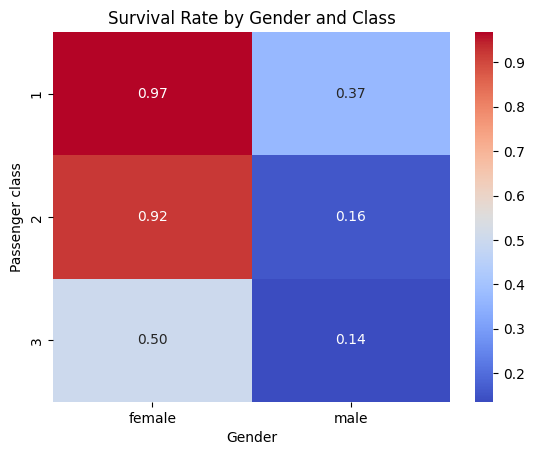

In [192]:
#code

class_survival_rate = df.groupby(["Pclass","Sex"])["Survived"].mean().unstack()
# plt.figure(figsize=(8,6))
sns.heatmap(class_survival_rate,annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Survival Rate by Gender and Class")
plt.xlabel("Gender")
plt.ylabel("Passenger class")
plt.show()

### Seem like the Lower the class have a strong correlation of surviving?, people in class 1 have a highter rate of surviving

# 5. Were Women and children prioritized for survival?

- **Graph Type:** Divergent Bar Chart or Faceted Histogram
- **Objective:** Assess the survival rates for women and children compared to men
- **Question Prompt:** Create a divergent bar chart or faceted histogram to investigate whether women and children were prioritized during evacuation. what pattern do you observe 

Child    0.539823
dtype: float64


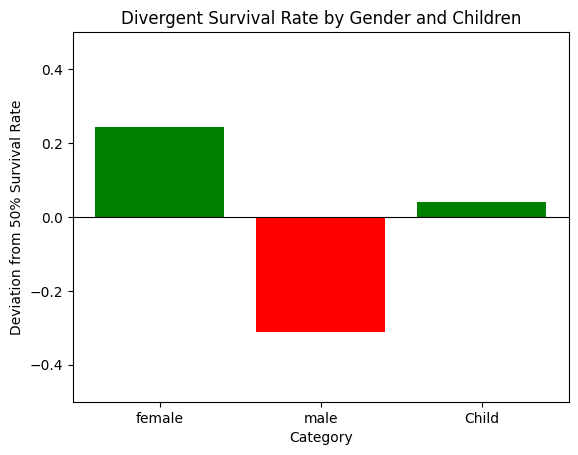

In [234]:


# Calculate survival rates for men and women
survival_by_gender = df.groupby("Sex")["Survived"].mean()
# Calculate survival rate for children
child_survival_rate = pd.Series({"Child": df[df["Age"] < 18]["Survived"].mean()})

print(child_survival_rate)

# Combine survival rates into a single Series
combined_survival = pd.concat([survival_by_gender, child_survival_rate])

# Create colors based on survival rates
colors = ['green' if val > 0.5 else 'red' for val in combined_survival.values]

# Plot divergent bar chart
plt.bar(combined_survival.index, combined_survival.values - 0.5, color=colors)
plt.axhline(0, color='black', linewidth=0.8)

# Customize the plot
plt.title("Divergent Survival Rate by Gender and Children")
plt.xlabel("Category")
plt.ylabel("Deviation from 50% Survival Rate")
plt.xticks(rotation=0)
plt.ylim(-0.5, 0.5)  # Deviation from 50%
plt.show()


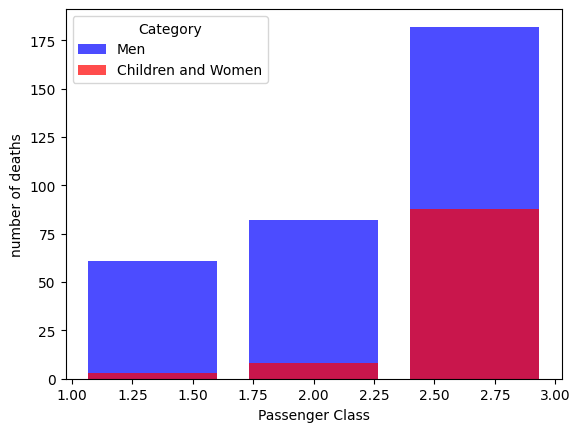

In [197]:
# filter who did not survived
titanic_deaths = df[df["Survived"] == 0]

# separate into male, female and kids
male_deaths = titanic_deaths[(titanic_deaths['Sex'] == 'male') & (titanic_deaths['Age'] >= 18)]
female_deaths = titanic_deaths[(titanic_deaths['Sex'] == 'female') & (titanic_deaths['Age'] >= 18)]
children_deaths = titanic_deaths[titanic_deaths['Age'] < 18]
#combine children and women
women_and_children_deaths = pd.concat([female_deaths,children_deaths])


survival_by_gender = df.groupby("Sex")["Survived"].mean()
# Calculate survival rate for children
child_survival_rate = df[df["Age"] < 18]["Survived"].mean()


plt.hist(male_deaths["Pclass"], bins=3, label="Men", color="blue", alpha=0.7, rwidth=0.8)
plt.hist(women_and_children_deaths["Pclass"], bins=3, label="Children and Women", color="red", alpha=0.7, rwidth=0.8)
plt.ylabel("number of deaths")
plt.xlabel("Passenger Class")
plt.legend(title='Category')
plt.show()

### seem like there is less dead the lower the passenger class 

# 6. How do key variables like Age, Fare, Family Size relate to sruvival

- **Graph Type:** PairPlot
- **Objective:** Investigate relationships among multiple variables and their connection to sruvival
- **Question Prompt:** Use a pairplot to explore the relationships between Age, Fare and Family Size (SibSp + Parch + 1) for passengers who survived and those who did not. What patterns or clusters can you identify

Text(0.5, 0.98, 'Pairplot of Titanic data')

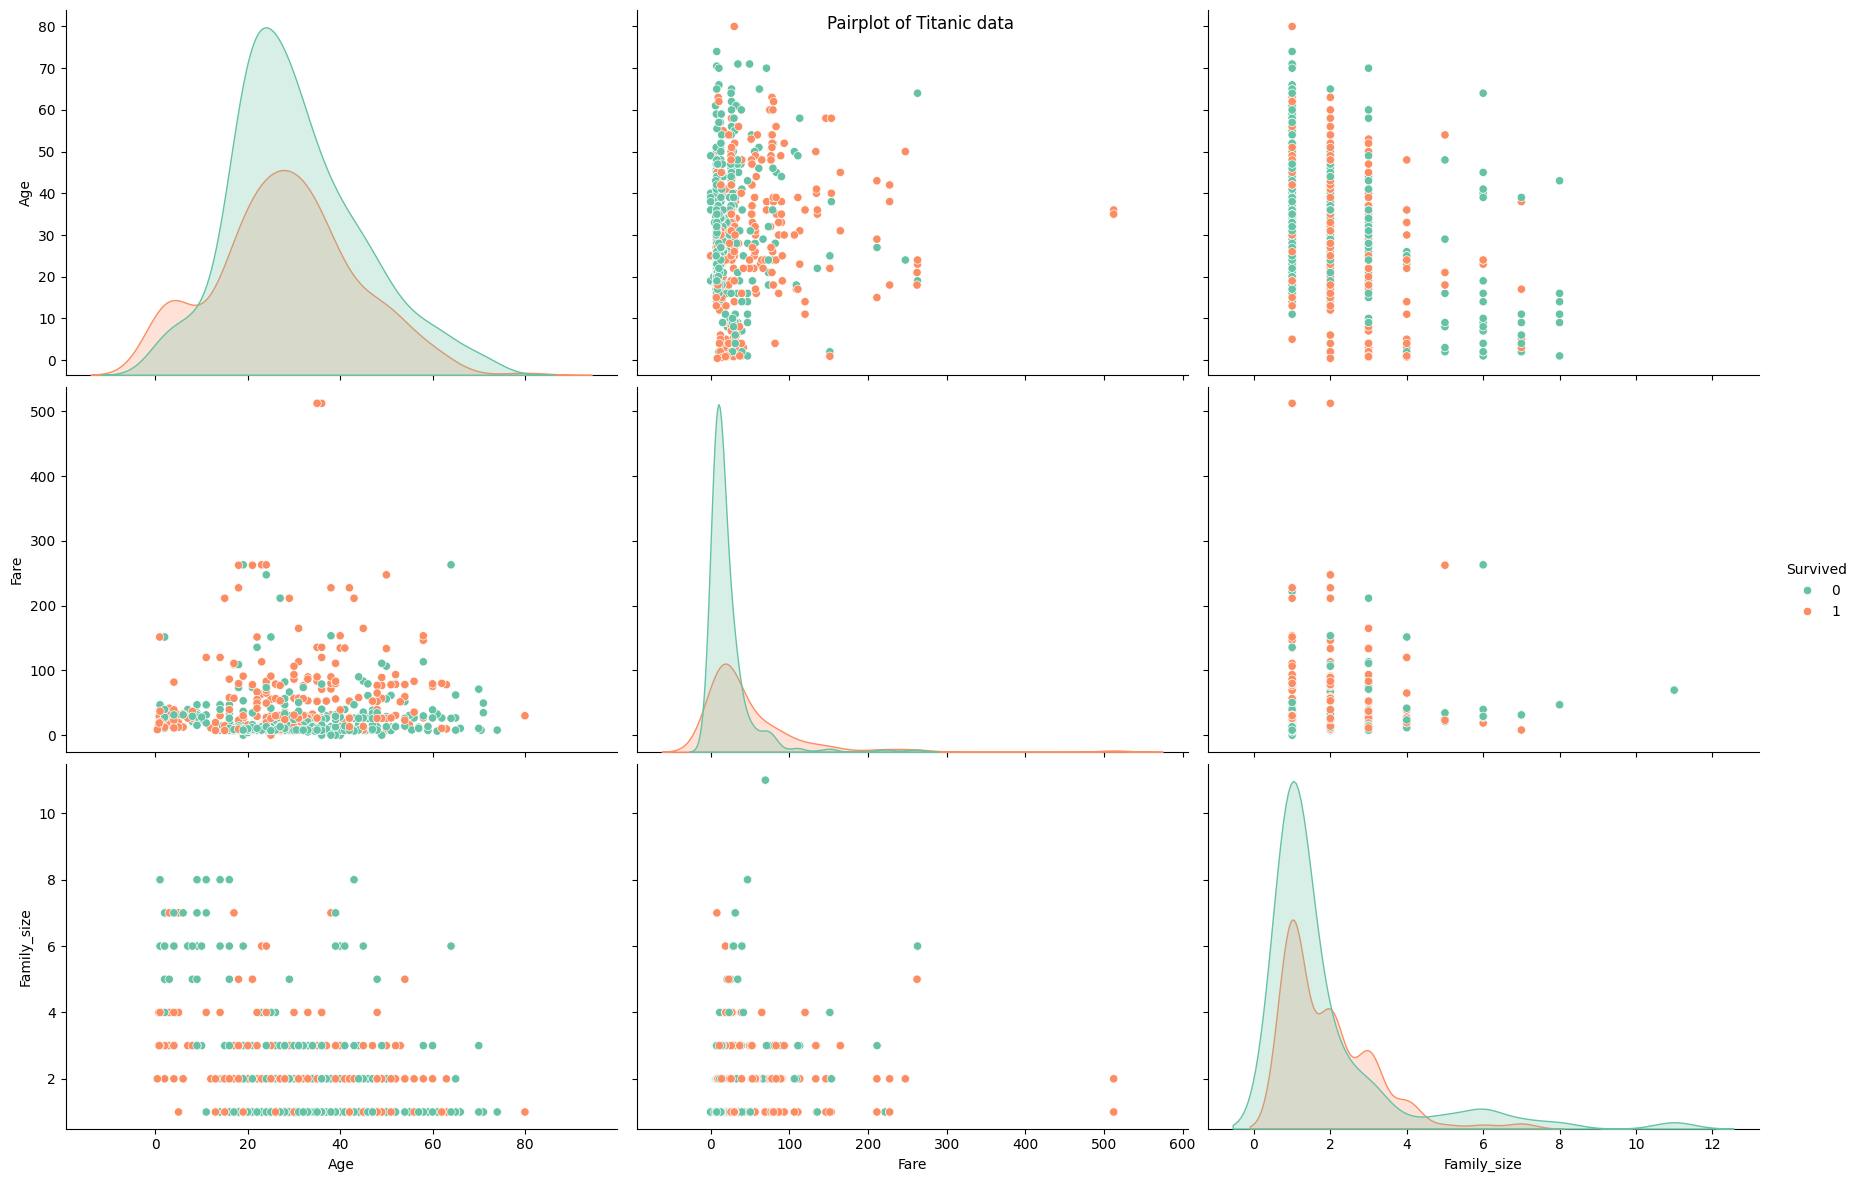

In [ ]:
# Pairplot

# make a family size column
df["Family_size"] = df["SibSp"] + (df["Parch"] +1)


sns.pairplot(df,vars=["Age", "Fare", "Family_size"], hue="Survived", palette="Set2", diag_kind="kde", height=4, aspect=1.5)
plt.suptitle("Pairplot of Titanic data")

# 7. Can we explore the survival trends interactively? 

- **Graph Type:** Interactive Scatter Plot 
- **Objective:** Enalble exploration of survival data based on multiple variables interactively
- **Question Prompt:** Use an interactive scatter plot to examine how Age and Fare relate to survival. Include hover-over details for gender, class and family size. What insights can you gather from the interactive visualization?

In [ ]:

import plotly.express as px

fig = px.scatter(df, x="Fare", y="Age", color="Survived", size="Family_size",
                    hover_data=["Sex","Pclass","Family_size"], title="Survival by Fare and Age")
fig.show()